In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("../data/dataset2/steam-200k.csv"
                ,usecols=[0,1,2,3],
                 names=['user','game_name','behavior','hoursplayed'])
df['user'] = df.user.astype(str)

In [3]:
df.head()

,user,game_name,behavior,hoursplayed
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
set(df["behavior"])

{'play', 'purchase'}

In [4]:
df_without_purchase = df.loc[df["behavior"]=="play"]

df_without_purchase.describe()

,hoursplayed
count,70489.000000
mean,48.878063
std,229.335236
min,0.100000
25%,1.000000
50%,4.500000
75%,19.100000
max,11754.000000


In [6]:
print("mean")
df_without_purchase.groupby(['game_name']).mean().sort_values(by="hoursplayed",ascending=False).head()



test = df_without_purchase.groupby(['game_name']).mean().sort_values(by="hoursplayed",ascending=False)
test.index

mean


Index(['Eastside Hockey Manager', 'Baldur's Gate II Enhanced Edition',
       'FIFA Manager 09', 'Perpetuum', 'Football Manager 2014',
       'Football Manager 2012', 'Football Manager 2010',
       'Football Manager 2011', 'Freaking Meatbags',
       'Out of the Park Baseball 16',
       ...
       'Unity of Command', 'Victory At Sea',
       'Agricultural Simulator 2011 Extended Edition', 'Dark Echo',
       'Urizen Shadows of the Cold', 'Killing Floor Beta', 'Formula Fusion',
       'Inside a Star-filled Sky ', 'Space Warp', 'Ohm Studio'],
      dtype='object', name='game_name', length=3600)

In [5]:
print("sum")
df_without_purchase.groupby(['game_name']).sum().sort_values(by="hoursplayed",ascending=False).head()

sum


,hoursplayed
game_name,
Dota 2,981684.6
Counter-Strike Global Offensive,322771.6
Team Fortress 2,173673.3
Counter-Strike,134261.1
Sid Meier's Civilization V,99821.3


In [6]:
print(f"Number of unique games: {len(df_without_purchase['game_name'].unique())}")
print(f"Number of unique users: {len(df_without_purchase['user'].unique())}")

Number of unique games: 3600
Number of unique users: 11350


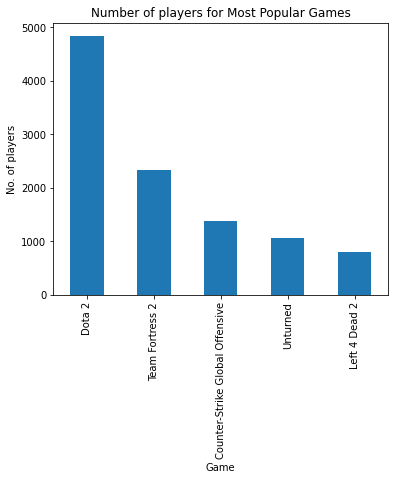

In [7]:
to_plot = df_without_purchase.groupby('game_name')['user'].nunique().sort_values(ascending=False).head()
ax = to_plot.plot(kind='bar', title='Number of players for Most Popular Games', ylabel='No. of players',
         xlabel='Game', figsize=(6, 5))

###  hoursplayed


In [10]:
df_without_purchase[df_without_purchase["user"] == "151603712"]

,user,game_name,behavior,hoursplayed
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9
11,151603712,HuniePop,play,8.5
13,151603712,Path of Exile,play,8.1
15,151603712,Poly Bridge,play,7.5
17,151603712,Left 4 Dead,play,3.3
19,151603712,Team Fortress 2,play,2.8


In [9]:

totaltime = df_without_purchase.groupby(['user'],as_index=False).hoursplayed.sum()
totaltime['totaltime'] = totaltime['hoursplayed']

totaltime.drop('hoursplayed',axis=1,inplace=True)

final_ratings = pd.merge(df_without_purchase,totaltime[['user','totaltime']],on='user')

In [10]:
final_ratings.head()

,user,game_name,behavior,hoursplayed,totaltime
0,151603712,The Elder Scrolls V Skyrim,play,273.0,439.9
1,151603712,Fallout 4,play,87.0,439.9
2,151603712,Spore,play,14.9,439.9
3,151603712,Fallout New Vegas,play,12.1,439.9
4,151603712,Left 4 Dead 2,play,8.9,439.9


<AxesSubplot:xlabel='score', ylabel='Count'>

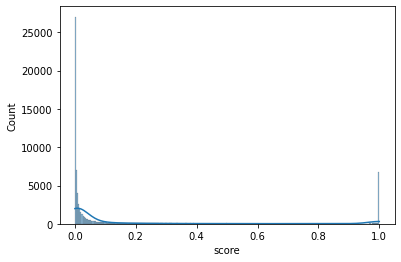

In [15]:
final_ratings['score'] = final_ratings['hoursplayed']/final_ratings['totaltime']
x =final_ratings['score'] 
sns.histplot(x, kde=True)


<AxesSubplot:ylabel='Count'>

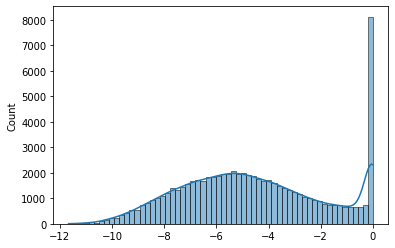

In [12]:
log_x = x.map(math.log)
sns.histplot(log_x, kde=True)

<AxesSubplot:ylabel='Count'>

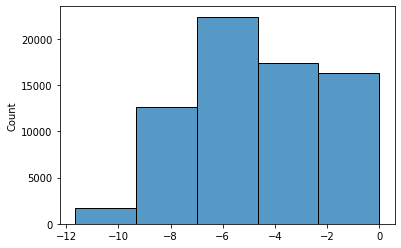

In [13]:
sns.histplot(log_x, bins=5)

In [14]:
_, bins = np.histogram(log_x,bins=5)
bins

array([-11.66579246,  -9.33263397,  -6.99947548,  -4.66631699,
        -2.33315849,   0.        ])

In [20]:
piv = final_ratings.pivot_table(index=['user'], columns=['game_name'], values='score')

In [21]:
print(piv.shape)
piv.head()

(11350, 3600)


game_name,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user,,,,,,,,,,,,,,,,,,,,,
100012061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [23]:
piv_norm.shape

(11350, 3576)

In [25]:
piv_norm.head()

game_name,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user,,,,,,,,,,,,,,,,,,,,,
100012061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100053304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100057229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100070732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100096071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(piv_norm)

neigh.kneighbors([[i%5 for i in range(3576)]])


/home/obxd/src/game_hybrid_recommendation/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[146.42615714, 146.42716457, 146.42861185, 146.43099086,
         146.43179334, 146.43235894, 146.43255727, 146.43295047,
         146.4373777 , 146.43828351]]),
 array([[10388,  3294, 10432,  1945,  1139,  9567,   298, 11053, 11138,
          6740]]))

In [28]:
piv_norm.loc["100096071"].sort_values( ascending=False)

game_name
The Elder Scrolls V Skyrim                0.789990
Euro Truck Simulator 2                    0.771087
LEGO MARVEL Super Heroes                  0.745882
Just Cause 2                              0.197678
Fallout New Vegas                         0.191376
                                            ...   
King Arthur - The Role-playing Wargame   -0.203709
Unturned                                 -0.206229
Far Cry 2                                -0.206229
Half-Life Opposing Force                 -0.207489
Nosgoth                                  -0.210010
Name: 100096071, Length: 3576, dtype: float64

In [29]:
piv_norm.loc["100096071"].sort_values( ascending=False).index

Index(['The Elder Scrolls V Skyrim', 'Euro Truck Simulator 2',
       'LEGO MARVEL Super Heroes', 'Just Cause 2', 'Fallout New Vegas',
       '007 Legends', 'Realm of the Mad God', 'Rayman Origins',
       'Razor2 Hidden Skies', 'Reach for the Sun',
       ...
       'DOOM 3', 'Marvel Heroes 2015', 'Dota 2', 'DC Universe Online',
       'Half-Life 2 Episode One', 'King Arthur - The Role-playing Wargame',
       'Unturned', 'Far Cry 2', 'Half-Life Opposing Force', 'Nosgoth'],
      dtype='object', name='game_name', length=3576)